# Experiment 3 - look at accuracies as a function of number of practiced tasks trained
#### Train on both positive/negative versions of sensorimotor task

In [30]:
import numpy as np
import torch
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from model import analysis
from model import task
from importlib import reload
import tools
import pandas as pd
analysis = reload(analysis)
plt.style.use("ggplot")
sns.set_style('whitegrid')

In [31]:
datadir = '../../data/results/experiment3/'

# Load data

In [32]:
df = pd.read_csv(datadir + 'expt3_sgd_zeroshot_2layers_pretraining_posneg_simData0.csv')
df.insert(len(df.columns),"Simulation",list(np.repeat(0,len(df))),True)
df.insert(len(df.columns),"Pretraining",list(np.repeat('Affirmative-Negative',len(df))),True)
df.insert(len(df.columns),"Optimizer",list(np.repeat('SGD',len(df))),True)
#
tmp = pd.read_csv(datadir + 'expt3_adam_zeroshot_2layers_pretraining_posneg_simData0.csv')
tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(0,len(tmp))),True)
tmp.insert(len(tmp.columns),"Pretraining",list(np.repeat('Affirmative-Negative',len(tmp))),True)
tmp.insert(len(tmp.columns),"Optimizer",list(np.repeat('Adam',len(tmp))),True)
df = df.append(tmp)
#
tmp = pd.read_csv(datadir + 'expt3_sgd_zeroshot_2layers_pretraining_simData0.csv')
tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(0,len(tmp))),True)
tmp.insert(len(tmp.columns),"Pretraining",list(np.repeat('Affirmative',len(tmp))),True)
tmp.insert(len(tmp.columns),"Optimizer",list(np.repeat('SGD',len(tmp))),True)
df = df.append(tmp)
#
tmp = pd.read_csv(datadir + 'expt3_adam_zeroshot_2layers_pretraining_simData0.csv')
tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(0,len(tmp))),True)
tmp.insert(len(tmp.columns),"Pretraining",list(np.repeat('Affirmative',len(tmp))),True)
tmp.insert(len(tmp.columns),"Optimizer",list(np.repeat('Adam',len(tmp))),True)
df = df.append(tmp)
#
tmp = pd.read_csv(datadir + 'expt3_sgd_zeroshot_2layers_pretraining_negation_simData0.csv')
tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(0,len(tmp))),True)
tmp.insert(len(tmp.columns),"Pretraining",list(np.repeat('Negative',len(tmp))),True)
tmp.insert(len(tmp.columns),"Optimizer",list(np.repeat('SGD',len(tmp))),True)
df = df.append(tmp)
#
tmp = pd.read_csv(datadir + 'expt3_adam_zeroshot_2layers_pretraining_negation_simData0.csv')
tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(0,len(tmp))),True)
tmp.insert(len(tmp.columns),"Pretraining",list(np.repeat('Negative',len(tmp))),True)
tmp.insert(len(tmp.columns),"Optimizer",list(np.repeat('Adam',len(tmp))),True)
df = df.append(tmp)
#
tmp = pd.read_csv(datadir + 'expt3_adam_zeroshot_2layers_simData0.csv')
tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(0,len(tmp))),True)
tmp.insert(len(tmp.columns),"Pretraining",list(np.repeat('NoPretraining',len(tmp))),True)
tmp.insert(len(tmp.columns),"Optimizer",list(np.repeat('N/A',len(tmp))),True)
df = df.append(tmp)
#
for i in range(1,20):
    tmp = pd.read_csv(datadir + 'expt3_sgd_zeroshot_2layers_pretraining_posneg_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(0,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Pretraining",list(np.repeat('Affirmative-Negative',len(tmp))),True)
    tmp.insert(len(tmp.columns),"Optimizer",list(np.repeat('SGD',len(tmp))),True)
    df = df.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt3_adam_zeroshot_2layers_pretraining_posneg_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(0,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Pretraining",list(np.repeat('Affirmative-Negative',len(tmp))),True)
    tmp.insert(len(tmp.columns),"Optimizer",list(np.repeat('Adam',len(tmp))),True)
    df = df.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt3_sgd_zeroshot_2layers_pretraining_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(0,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Pretraining",list(np.repeat('Affirmative',len(tmp))),True)
    tmp.insert(len(tmp.columns),"Optimizer",list(np.repeat('SGD',len(tmp))),True)
    df = df.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt3_adam_zeroshot_2layers_pretraining_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(0,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Pretraining",list(np.repeat('Affirmative',len(tmp))),True)
    tmp.insert(len(tmp.columns),"Optimizer",list(np.repeat('Adam',len(tmp))),True)
    df = df.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt3_sgd_zeroshot_2layers_pretraining_negation_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(0,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Pretraining",list(np.repeat('Negative',len(tmp))),True)
    tmp.insert(len(tmp.columns),"Optimizer",list(np.repeat('SGD',len(tmp))),True)
    df = df.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt3_adam_zeroshot_2layers_pretraining_negation_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(0,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Pretraining",list(np.repeat('Negative',len(tmp))),True)
    tmp.insert(len(tmp.columns),"Optimizer",list(np.repeat('Adam',len(tmp))),True)
    df = df.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt3_adam_zeroshot_2layers_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(0,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Pretraining",list(np.repeat('NoPretraining',len(tmp))),True)
    tmp.insert(len(tmp.columns),"Optimizer",list(np.repeat('N/A',len(tmp))),True)
    df = df.append(tmp)

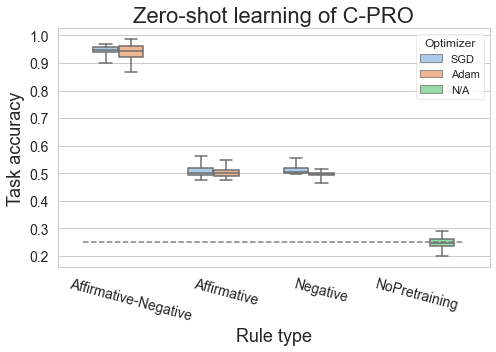

In [38]:
#### Plot
plt.figure(figsize=(7,5))
sns.boxplot(x="Pretraining", y="Accuracy", hue='Optimizer', data=df,
            medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
plt.plot(np.arange(-0.5,4.5),np.repeat(.25,5),'gray',linestyle='--',label='Chance accuracy')
plt.title("Zero-shot learning of C-PRO",fontsize=22)
plt.xlabel('Rule type',fontsize=18)
plt.ylabel('Task accuracy',fontsize=18)
plt.xticks(fontsize=14,rotation=-15)
plt.yticks(fontsize=14)
plt.tight_layout()